## Test available clustering algorithms, using a suite of datasets

In [1]:
#Test Birch, Gaussian Mixtures, HDBSCAN
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe

n_samples=1500
X,y = datasets.make_blobs(n_samples=n_samples, random_state=8)
df = pd.DataFrame(X)
d = oe.data(df, [1,2])

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


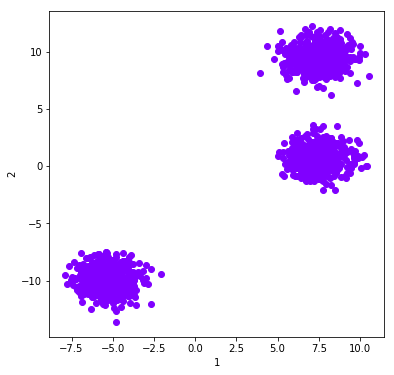

In [2]:
fig = d.plot_data('parent')

In [7]:
c = oe.cluster(d)

In [8]:
c.algorithms_available()

{'AffinityPropagation': '',
 'Birch': '',
 'DBSCAN': '',
 'GaussianMixture': '',
 'HDBSCAN': '',
 'MeanShift': '',
 'agglomerative': '',
 'kmeans': '',
 'spectral': ''}

In [9]:
c.cluster('parent', 'Birch', 'Birch', K=3)
c.cluster('parent', 'agglomerative', 'ward_linked', K=3, linkage='ward')
c.cluster('parent', 'agglomerative', 'ward_linked', K=2, linkage='ward')
c.cluster('parent', 'GaussianMixture', 'GM_default', K=3)
c.cluster('parent', 'MeanShift', 'MeanShift')
c.cluster('parent', 'MeanShift', 'MeanShift_0.5', quantile=0.5)
c.cluster('parent', 'HDBSCAN', 'HDBSCAN', distance='euclidean')
c.cluster('parent', 'HDBSCAN', 'HDBSCAN_cosine', distance='cosine')

/anaconda2/envs/py36/lib/python3.6/site-packages/openensembles/openensembles.py:464: UserWarning: For uniqueness, altered output_name to be ward_linked_5294
  warnings.warn('For uniqueness, altered output_name to be %s'%(output_name), UserWarning)


/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


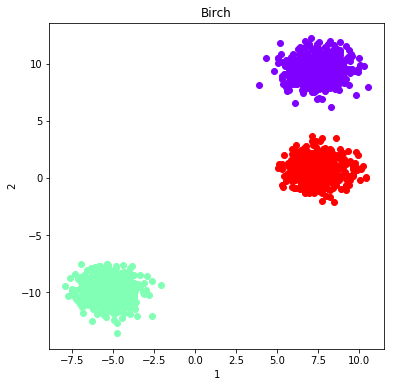

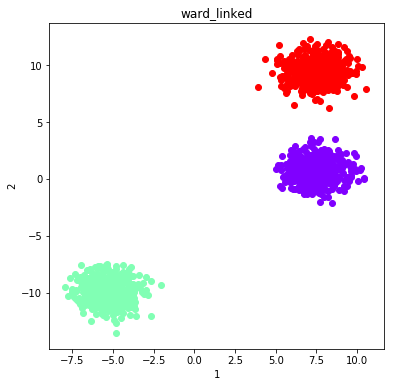

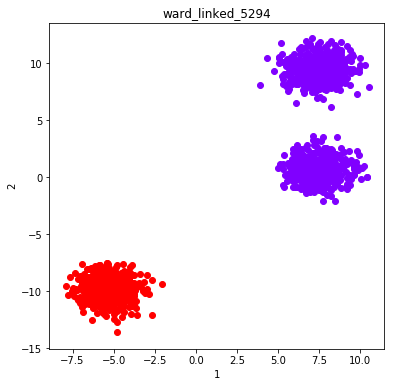

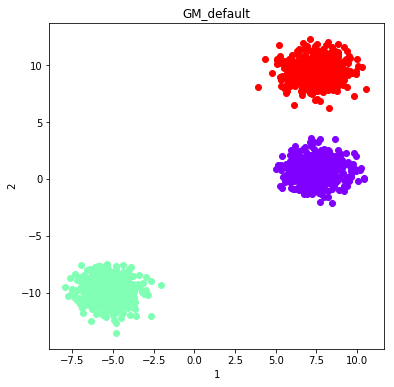

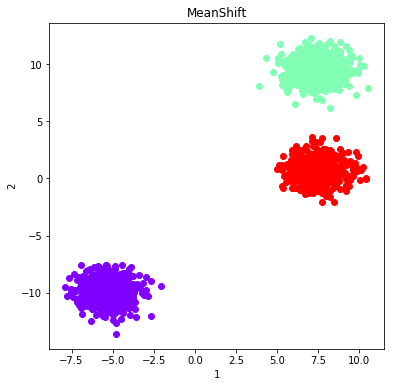

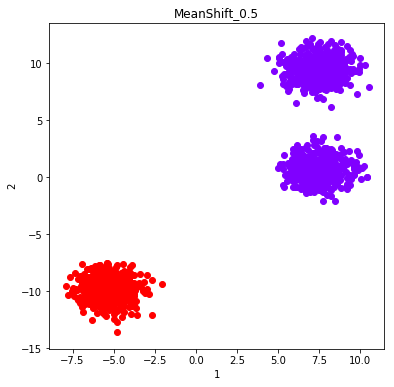

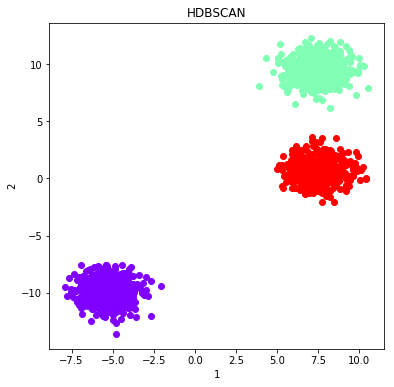

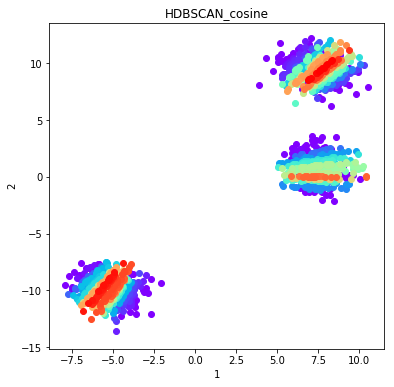

In [10]:
for cluster_type in c.labels.keys():
    
    f = d.plot_data('parent', class_labels=c.labels[cluster_type])
    plt.title(cluster_type)
    plt.show()
    

In [13]:
import hdbscan
y = hdbscan.HDBSCAN()
y.fit_predict(X)

array([1, 1, 1, ..., 1, 0, 0])

In [11]:
c.labels

{'Birch': array([0, 0, 0, ..., 0, 1, 1]),
 'Birch_3458': array([0, 0, 0, ..., 0, 1, 1]),
 'GM_default': array([1, 1, 1, ..., 1, 0, 0]),
 'GM_default_1068': array([2, 2, 2, ..., 2, 0, 0]),
 'HDBSCAN': HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
     approx_min_span_tree=True, cluster_selection_method='eom',
     core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
     match_reference_implementation=False, memory=Memory(cachedir=None),
     metric='precomputed', min_cluster_size=5, min_samples=None, p=(None,),
     prediction_data=False),
 'HDBSCAN_2111': HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
     approx_min_span_tree=True, cluster_selection_method='eom',
     core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
     match_reference_implementation=False, memory=Memory(cachedir=None),
     metric='precomputed', min_cluster_size=5, min_samples=None, p=(None,),
     prediction_data=False),
 'MeanShift': array([1, 1, 1, ..., 1, 0, 

In [6]:
seed = c.random_state['ward_linked']

In [7]:
seed[1][0]

2848211166

In [9]:
import numpy.random as random
random.get_state(seed)

### TEST random seed state


In [6]:
c = oe.cluster(d)
c_seed = oe.cluster(d)
K = 4
numIterations = 10
for i in range(1,numIterations):
    name = 'kmeans_' + str(i) #to append a new solution, it must have a name (dictionary key) that is unique
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1) #c.cluster will eventually become numIterations long
    c_seed.cluster('parent', 'kmeans', name, K, random_seed=0, init = 'random', n_init = 1)

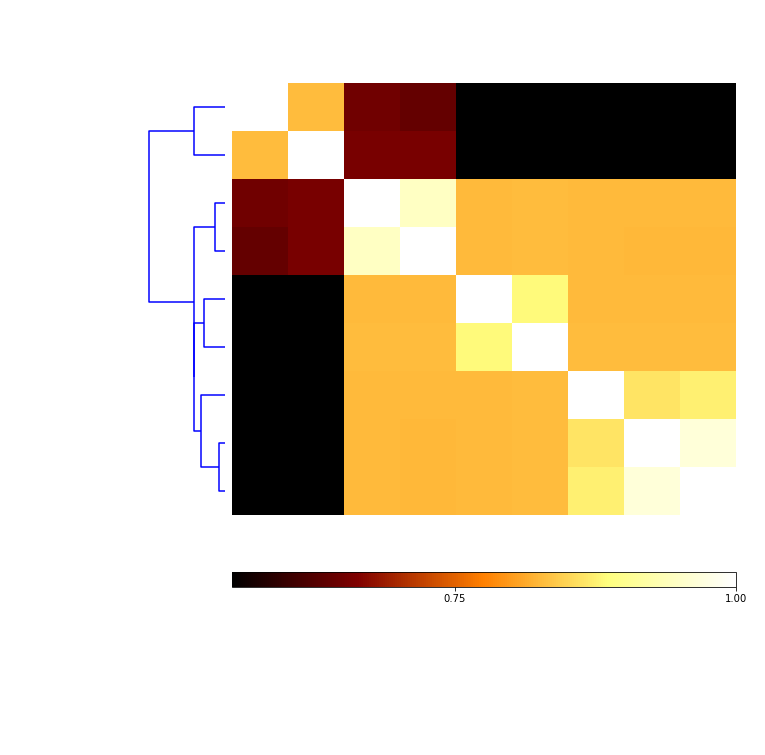

In [7]:
mi_randomSeeds = c.MI(MI_type='normalized')
mi_randomSeeds.plot(add_labels=False)

/Users/knaegle/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0
  'left=%s, right=%s') % (left, right))


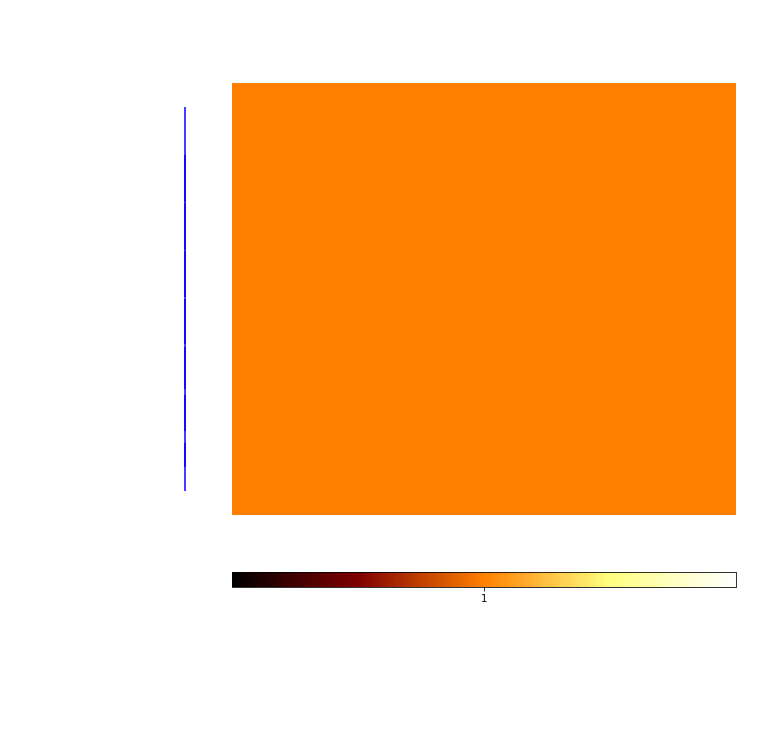

In [8]:
mi_sameSeeds = c_seed.MI(MI_type='normalized')
mi_sameSeeds.plot(add_labels=False)

In [19]:
mi_sameSeeds.matrix

,kmeans_1,kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6,kmeans_7,kmeans_8,kmeans_9
kmeans_1,1,0.889103,0.826538,0.826844,0.915338,0.826357,0.877229,0.826245,0.860262
kmeans_2,0.889103,1,0.828304,0.828611,0.855102,0.828123,0.961873,0.828011,0.83134
kmeans_3,0.826538,0.828304,1,0.82714,0.8269,0.866189,0.829462,0.93849,0.826575
kmeans_4,0.826844,0.828611,0.82714,1,0.827207,0.82696,0.82977,0.826848,0.826881
kmeans_5,0.915338,0.855102,0.8269,0.827207,1,0.82672,0.849367,0.826608,0.895491
kmeans_6,0.826357,0.828123,0.866189,0.82696,0.82672,1,0.829281,0.84755,0.826395
kmeans_7,0.877229,0.961873,0.829462,0.82977,0.849367,0.829281,1,0.829169,0.830468
kmeans_8,0.826245,0.828011,0.93849,0.826848,0.826608,0.84755,0.829169,1,0.826283
kmeans_9,0.860262,0.83134,0.826575,0.826881,0.895491,0.826395,0.830468,0.826283,1


In [20]:
mi_randomSeeds.matrix

,kmeans_1,kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6,kmeans_7,kmeans_8,kmeans_9
kmeans_1,1,0.826511,0.867377,0.826482,0.833463,0.826295,0.826263,0.551616,0.826405
kmeans_2,0.826511,1,0.826943,0.826743,0.82877,0.882084,0.886144,0.55179,0.826666
kmeans_3,0.867377,0.826943,1,0.826914,0.836155,0.826727,0.826695,0.551904,0.826837
kmeans_4,0.826482,0.826743,0.826914,1,0.828741,0.826527,0.826495,0.667479,0.904456
kmeans_5,0.833463,0.82877,0.836155,0.828741,1,0.828554,0.828521,0.553124,0.828664
kmeans_6,0.826295,0.882084,0.826727,0.826527,0.828554,1,0.986439,0.551646,0.82645
kmeans_7,0.826263,0.886144,0.826695,0.826495,0.828521,0.986439,1,0.551625,0.826418
kmeans_8,0.551616,0.55179,0.551904,0.667479,0.553124,0.551646,0.551625,1,0.67958
kmeans_9,0.826405,0.826666,0.826837,0.904456,0.828664,0.82645,0.826418,0.67958,1


In [7]:
c.search_field('algorithm', 'Birch')

['Birch']

In [8]:
c.search_field('linkage', 'ward')

['ward_linked', 'ward_linked_6791']

In [9]:
c.search_field('algorithm', 'agglomerative')

['ward_linked', 'ward_linked_6791']

In [10]:
c.search_field('data_source', 'parent')

['Birch', 'ward_linked', 'ward_linked_6791']

In [11]:
c.search_field('clusterNumber', 3)

['Birch', 'ward_linked']

In [12]:
c.params

{'Birch': {'K': 3,
  'branching_factor': 50,
  'compute_labels': True,
  'copy': True,
  'distance': 'euclidean',
  'n_clusters': 3,
  'threshold': 0.5},
 'ward_linked': {'K': 3,
  'affinity': 'euclidean',
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance': 'euclidean',
  'linkage': 'ward',
  'pooling_func': <function numpy.core.fromnumeric.mean>},
 'ward_linked_6791': {'K': 2,
  'affinity': 'euclidean',
  'compute_full_tree': 'auto',
  'connectivity': None,
  'distance': 'euclidean',
  'linkage': 'ward',
  'pooling_func': <function numpy.core.fromnumeric.mean>}}

In [12]:
# Mutual information
c_3_names = c.search_field('clusterNumber', 3)
c_3 = c.slice(c_3_names)

In [14]:
c_3_names

['Birch', 'Birch_805', 'ward_linked']

In [6]:
mi= c.MI(MI_type='adjusted')

In [7]:
mi.matrix

,Birch,ward_linked,ward_linked_13
Birch,1,1,0.579124
ward_linked,1,1,0.579124
ward_linked_13,0.579124,0.579124,1


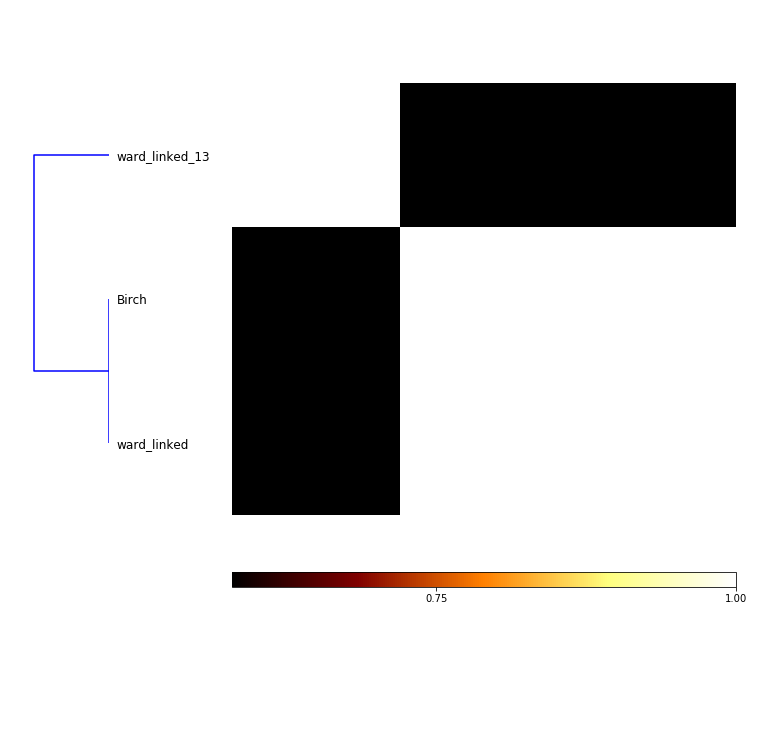

In [8]:
mi.plot()

In [34]:
import numpy as np
np.where(pd.isempty(mi.matrix))

AttributeError: module 'pandas' has no attribute 'isempty'

In [14]:
import sklearn.metrics as skm



In [18]:
skm.normalized_mutual_info_score(c.labels['Birch'], c.labels['ward_linked_78'])

0.7611702597222878

In [19]:
skm.adjusted_mutual_info_score(c.labels['Birch'], c.labels['ward_linked_78'])

0.5791243675027935

In [20]:
skm.mutual_info_score(c.labels['Birch'], c.labels['ward_linked_78'])

0.636514168294813

In [9]:
import random

In [10]:
a = random.getstate()

In [11]:
a

(3,
 (3902216960,
  2065640029,
  2435065078,
  49137098,
  2956134450,
  298110399,
  3887400467,
  799452726,
  3180739790,
  119985519,
  3734443086,
  993450693,
  499519384,
  2009390533,
  2072791247,
  2431325531,
  3823485316,
  1852603808,
  2355598089,
  1552567222,
  2813190183,
  1768365909,
  2396982004,
  1588029352,
  3678135437,
  1777531553,
  3199024179,
  1376509959,
  2244820559,
  1540233294,
  963359172,
  3983562499,
  3799494419,
  1574823017,
  3530080141,
  3110055000,
  1878843297,
  303462201,
  2649239319,
  3488962945,
  532754869,
  464631469,
  2382773340,
  1865435291,
  503653936,
  1812566490,
  2175317120,
  2328631081,
  210022026,
  3452804660,
  4004958486,
  340598691,
  519045240,
  4176183596,
  59794513,
  4097547039,
  23398693,
  2759327710,
  2660645785,
  577884669,
  263506752,
  1335565713,
  2878018716,
  89616991,
  1280640293,
  3793670852,
  968650155,
  3148514039,
  3564150289,
  1385520277,
  2621564905,
  3857861735,
  2478850230